# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
#!pip install citipy

  Using cached citipy-0.0.5.tar.gz (557 kB)
  Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559701 sha256=f492baeaab0330fefecbbb82b187705ba3113dd682c4c26816cf9713a8afcddb
  Stored in directory: /Users/jessicaramosmolina/Library/Caches/pip/wheels/eb/07/14/1c448d9fabf3aceac66270933ecae15693974a1b7f91266841
Successfully built citipy


In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = [] #this is where we pull the coordinates
cities = [] #we are using the coordinates to loop to the list of cities

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#the output changes everytime we have the np.radom unit form, it is randomizes the results so it will change

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#this is the link we use to pull weather information, after ? we will hava parameters
url = 'http://api.openweathermap.org/data/2.5/weather?' 

#build query URL
#"appid" is the application id, this is our API after the url 
#"&q=" is the query - extensions of the URL help determine specific content or action based on the data being delivered
#in this case our query is the city
query_url = url + "appid=" + weather_api_key + "&q=" + city
query_url = f"{url}appid={weather_api_key}&units=imperial&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=f2deb80b0bea75908cebab9ed8582510&units=imperial&q=


In [4]:
#get weather data
#we turn it into a json format
weather_response = requests.get(query_url)
weather_json = weather_response.json()

In [8]:
# counter = 1 #can be used for the cities, 
# for i in range(len(cities)):
#     query_url = url + "appid=" + weather_api_key + "&q=" + cities[i] + '&units=imperial' # Build query URL, imperial units
#     weather_response = requests.get(query_url)
#     weather_json = weather_response.json()
    
#     #if weather_response['cod'] != '404': #to eliminate city names that aren't found with Citipy
#     print('City Number: ' + str(counter) + ' | City Name: ' + weather_json.get('name'))
#     print('Requested URL: ' + str(query_url))
#     print('-----------------------------------')
#     counter += 1
#     weather_response['city'][weather_response['city'].index[i]] = weather_json.get('name')

#create a for loop that will through request made
#append the values trying to retrived from said list

#creating empty lists for every item in our query 
city_name = []
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = [] 
country = []

x = 0

print('Beginning Data Retrieval')
print("-"*25)
for i in cities:
    try:
        weather_response = requests.get(query_url + i).json() #each city that is in my cities list
        x = x + 1
        print(f'Processing Record {x} | {i}')
        city_name.append(weather_response["name"])
        latitude.append(weather_response["coord"]["lat"])
        longitude.append(weather_response["coord"]["lon"])
        temperature.append(weather_response["main"]["temp_max"])
        humidity.append(weather_response["main"]["humidity"])
        cloudiness.append(weather_response["clouds"]["all"])
        wind_speed.append(weather_response["wind"]["speed"])
        country.append(weather_response["sys"]["country"])
    except KeyError:
        print("City not found")
    

Beginning Data Retrieval
-------------------------
Processing Record 1 | albany
Processing Record 2 | khatanga
Processing Record 3 | port elizabeth
Processing Record 4 | carnarvon
Processing Record 5 | busselton
Processing Record 6 | saskylakh
Processing Record 7 | arraial do cabo
Processing Record 8 | sinkat
City not found
Processing Record 9 | bengkulu
Processing Record 10 | ponta do sol
Processing Record 11 | punta arenas
Processing Record 12 | vaini
Processing Record 13 | lebu
Processing Record 14 | rikitea
Processing Record 15 | vidim
Processing Record 16 | ilihan
Processing Record 17 | mar del plata
Processing Record 18 | katherine
Processing Record 19 | atuona
Processing Record 20 | ushuaia
Processing Record 21 | saint-pierre
Processing Record 22 | quelimane
Processing Record 23 | hobart
Processing Record 24 | oussouye
Processing Record 25 | barrow
Processing Record 26 | vanimo
Processing Record 27 | karpathos
Processing Record 28 | dombarovskiy
Processing Record 29 | mataura
Pr

Processing Record 233 | hambantota
Processing Record 234 | palmer
Processing Record 235 | turukhansk
Processing Record 236 | taltal
Processing Record 237 | broome
Processing Record 238 | segou
Processing Record 239 | kurilsk
Processing Record 240 | murray bridge
Processing Record 241 | chesterfield
Processing Record 242 | rongcheng
Processing Record 243 | codrington
Processing Record 244 | gussago
Processing Record 245 | denpasar
Processing Record 246 | anloga
Processing Record 247 | xuddur
Processing Record 248 | provideniya
Processing Record 249 | fremont
Processing Record 250 | rosetown
Processing Record 251 | addi ugri
City not found
Processing Record 252 | nishihara
Processing Record 253 | dikson
Processing Record 254 | cockburn town
Processing Record 255 | opuwo
Processing Record 256 | luwuk
Processing Record 257 | emerald
Processing Record 258 | santa maria
Processing Record 259 | lahad datu
Processing Record 260 | ziro
Processing Record 261 | chapleau
Processing Record 262 | an

Processing Record 476 | sataua
City not found
Processing Record 477 | sao filipe
Processing Record 478 | svetlaya
Processing Record 479 | butterworth
Processing Record 480 | clyde river
Processing Record 481 | tigil
Processing Record 482 | lubao
Processing Record 483 | napier
Processing Record 484 | harper
Processing Record 485 | taveta
Processing Record 486 | killybegs
Processing Record 487 | lufilufi
Processing Record 488 | bom jardim
Processing Record 489 | pisco
Processing Record 490 | verkhnetulomskiy
Processing Record 491 | camacha
Processing Record 492 | alice springs
Processing Record 493 | sola
Processing Record 494 | baruun-urt
Processing Record 495 | ulagan
Processing Record 496 | barhi
Processing Record 497 | quthing
Processing Record 498 | monrovia
Processing Record 499 | bargal
City not found
Processing Record 500 | groningen
Processing Record 501 | goure
Processing Record 502 | ust-kuyga
Processing Record 503 | tefe
Processing Record 504 | hualmay
Processing Record 505 |

In [10]:
# retrieved_items = pd.DataFrame({
#     "City": city_name,
#     "Lat": latitude,
#     "Lng": longitude,
#     "Max Temp" : temperature,
#     "Humidity" : humidity,
#     "Cloudiness" : cloudiness,
#     "Wind Speed (mph)": wind_speed,
#     "Country": country
# })
# retrieved_items.head()

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
#convert raw data to DataFrame
weather_df = pd.DataFrame({
    "City": city_name,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp" : temperature,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed (mph)": wind_speed,
    "Country": country
})
weather_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed (mph),Country
0,Albany,42.60,-73.97,37.99,75,100,7.38,US
1,Khatanga,71.97,102.50,14.18,96,100,20.54,RU
2,Port Elizabeth,-33.92,25.57,60.80,100,100,4.70,ZA
3,Carnarvon,-24.87,113.63,71.60,83,0,11.41,AU
4,Busselton,-33.65,115.33,64.00,67,0,7.81,AU
5,Saskylakh,71.92,114.08,6.91,92,47,14.41,RU
6,Arraial do Cabo,-22.97,-42.03,75.20,73,75,13.87,BR
7,Bengkulu,-3.80,102.27,74.34,95,100,3.33,ID
8,Ponta do Sol,32.67,-17.10,66.20,77,20,9.17,PT
9,Punta Arenas,-53.15,-70.92,53.60,54,75,19.46,CL


In [17]:
#export data to csv
weather_df.to_csv('weather_data_output.csv')

#visualize to confirm airport data appears
#weather_df.sort_values('weather_data_output', ascending=False)

In [19]:
#summary of central tendency of dataset
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed (mph)
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,18.039929,20.974142,55.722124,74.251327,52.591150,7.770301
std,33.579643,90.699544,24.786623,19.544744,38.993602,5.173963
min,-54.800000,-175.200000,-19.970000,12.000000,0.000000,0.070000
25%,-9.830000,-60.670000,39.200000,67.000000,12.000000,3.710000
50%,20.340000,25.570000,62.600000,78.000000,56.000000,6.930000
75%,45.120000,104.620000,75.870000,88.000000,90.000000,10.290000
max,78.220000,179.320000,96.800000,100.000000,100.000000,35.570000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
list(weather_df.columns)

['City',
 'Lat',
 'Lng',
 'Max Temp',
 'Humidity',
 'Cloudiness',
 'Wind Speed (mph)',
 'Country']

In [29]:
#check for cities with humidity under 100%
weather_df.loc[weather_df['Humidity'] < 0]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed (mph),Country


In [30]:
#check that above code works by pulling humidity over 100%
weather_df.loc[weather_df['Humidity'] > 0]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed (mph),Country
0,Albany,42.60,-73.97,37.99,75,100,7.38,US
1,Khatanga,71.97,102.50,14.18,96,100,20.54,RU
2,Port Elizabeth,-33.92,25.57,60.80,100,100,4.70,ZA
3,Carnarvon,-24.87,113.63,71.60,83,0,11.41,AU
4,Busselton,-33.65,115.33,64.00,67,0,7.81,AU
...,...,...,...,...,...,...,...,...
560,Colquechaca,-18.67,-66.02,42.24,80,100,10.27,BO
561,Abu Dhabi,24.47,54.37,75.20,50,0,2.24,AE
562,Vänersborg,58.38,12.32,46.99,65,54,14.99,SE
563,Bakel,14.90,-12.46,84.18,14,10,8.79,SN


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

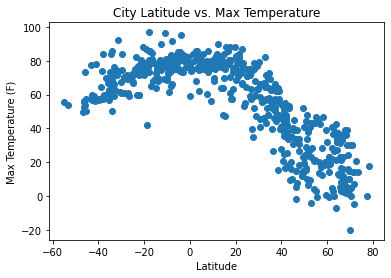

In [39]:
x_axis = weather_df['Lat']
y_axis = weather_df['Max Temp']

# making a scatter plot
plt.scatter(x_axis, y_axis, marker='o')

# giving the name to the x and y label
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

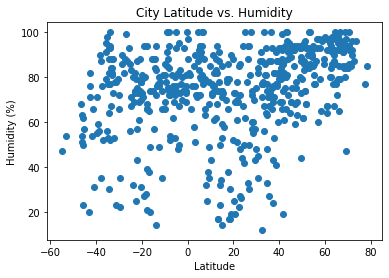

In [41]:
x_axis = weather_df['Lat']
y_axis = weather_df['Humidity']

# making a scatter plot
plt.scatter(x_axis, y_axis, marker='o')

# giving the name to the x and y label
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

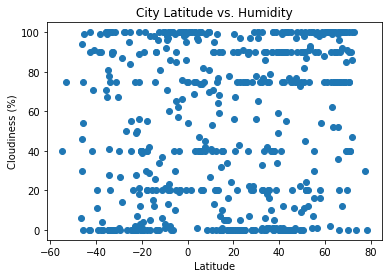

In [42]:
x_axis = weather_df['Lat']
y_axis = weather_df['Cloudiness']

# making a scatter plot
plt.scatter(x_axis, y_axis, marker='o')

# giving the name to the x and y label
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph))')

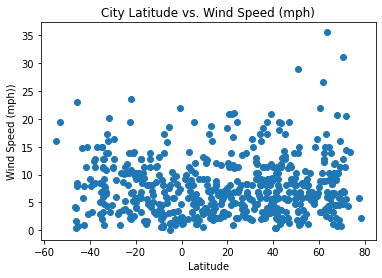

In [43]:
x_axis = weather_df['Lat']
y_axis = weather_df['Wind Speed (mph)']

# making a scatter plot
plt.scatter(x_axis, y_axis, marker='o')

# giving the name to the x and y label
plt.title('City Latitude vs. Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph))')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.73


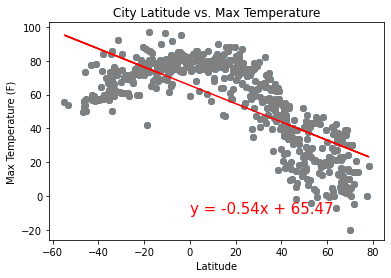

In [52]:
x_axis = weather_df['Lat']
y_axis = weather_df['Max Temp']

# making a scatter plot
plt.scatter(x_axis, y_axis, marker='o')

# giving the name to the x and y label
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

#finding the correlation
correlation = st.pearsonr(x_axis, y_axis)
correlation
print(f"The r-value is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,-10),fontsize=15,color="red")
plt.scatter(x_axis, y_axis, facecolor='grey')
plt.plot(x_axis,regress_values,"r-")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


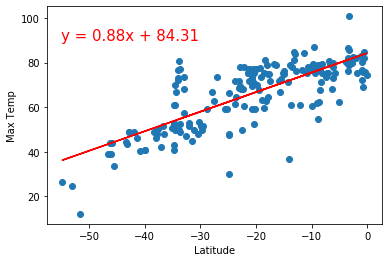

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.3


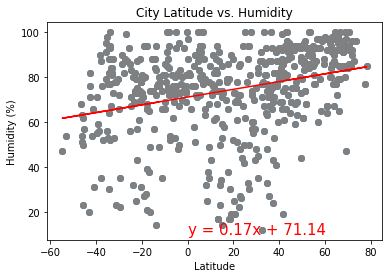

In [56]:
x_axis = weather_df['Lat']
y_axis = weather_df['Humidity']

# making a scatter plot
plt.scatter(x_axis, y_axis, marker='o')

# giving the name to the x and y label
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#finding the correlation
correlation = st.pearsonr(x_axis, y_axis)
correlation
print(f"The r-value is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.scatter(x_axis, y_axis, facecolor='grey')
plt.plot(x_axis,regress_values,"r-")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


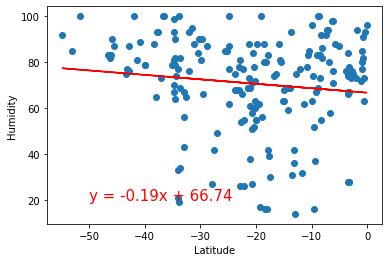

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

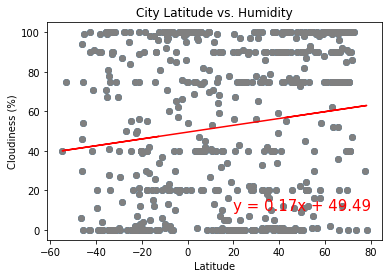

In [58]:
x_axis = weather_df['Lat']
y_axis = weather_df['Cloudiness']

# making a scatter plot
plt.scatter(x_axis, y_axis, marker='o')

# giving the name to the x and y label
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,10),fontsize=15,color="red")
plt.scatter(x_axis, y_axis, facecolor='grey')
plt.plot(x_axis,regress_values,"r-")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


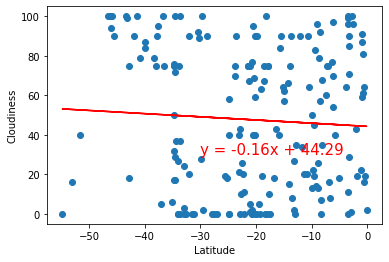

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

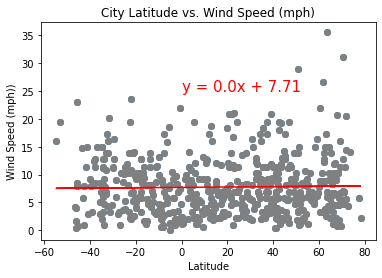

In [60]:
x_axis = weather_df['Lat']
y_axis = weather_df['Wind Speed (mph)']

# making a scatter plot
plt.scatter(x_axis, y_axis, marker='o')

# giving the name to the x and y label
plt.title('City Latitude vs. Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph))')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.scatter(x_axis, y_axis, facecolor='grey')
plt.plot(x_axis,regress_values,"r-")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


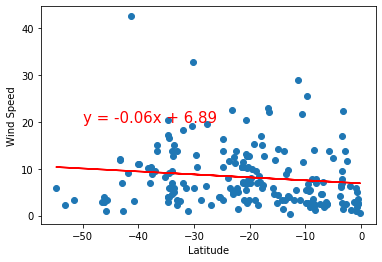